# Blue Whale Heart Rates

By how much do blue whale heart rates change when they dive down to find food? 

The file `blue-whale-heart-rates.csv` contains heart rate data (measured in beats per minute) for blue whales. The data captures the dynamics of their heart rates as they dive over one hundred meters deep to forage for food. The heart rate measurements are taken approximately every 10 seconds during 8 separate dives.

### Dive Phases
The data records the heart rates corresponding to different dive states:
1. Descent: The whale begins its dive, descending into the depths.
2. Lunging: The whale opens its mouth and lunges upward, engulfing prey and water.
3. Filtering: After lunging, the whale sinks slightly and filters out water to retain food.
4. Ascent: The whale returns to the surface to breathe, marking the end of a dive.
5.  Surface: The blue whale is now on the surface (upper 5 meters)

The lunging and filtering process may occur multiple times on a single dive. The next dive cycle begins with another descent.

In [ ]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'blue-whale-heart-rates.csv'.

# from google.colab import files
# uploaded = files.upload()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('blue-whale-heart-rates.csv')
df.head(8)


,timestamp,heart_rate,dive_id,dive_phase
0,8/27/18 17:10:10,NaN,2,descent
1,8/27/18 17:10:22,5.24,2,descent
2,8/27/18 17:10:31,6.55,2,descent
3,8/27/18 17:10:40,NaN,2,descent
4,8/27/18 17:10:48,NaN,2,descent
5,8/27/18 17:10:56,NaN,2,descent
6,8/27/18 17:11:06,NaN,2,descent
7,8/27/18 17:11:17,NaN,2,descent


### Project Ideas

#### Warmup
Calculate the average heart rates for each dive phase.

#### Challenge
Investigate the relationship between dive duration and the maximum heart rate at the surface following the dive.

1. Data Preparation:
	- Convert the `timestamp` column to datetime format.

2. Calculate Dive Duration:
	- For each `dive_id`, identify the earliest timestamp for the descent phase.
	- For each `dive_id`, find the latest timestamp for the ascent phase.
	- Compute the `dive_duration` by subtracting the start of the descent from the end of the ascent, then convert this duration to minutes (`dt.total_seconds() / 60`).
	- Store the results in a new dataframe with 2 columns: `dive_id` and `dive_duration`.

3. Determine Maximum Surface Heart Rate:
	- Identify the maximum heart rate recorded at the surface after each dive.
	- Store the results in a new dataframe with 2 columns: `dive_id` and `max_surface_heart_rate`

4. Merge DataFrames:
	- Merge the dive duration and max surface heart rate dataframes.
	
5.	Visualize the Data:
	- Generate a scatter plot with dive duration on the x-axis and maximum surface heart rate on the y-axis to illustrate their relationship.

1. The average heart rate during each dive phase:
  dive_phase  heart_rate
0     ascent   15.663171
1    descent    5.122360
2     filter    5.936190
3      lunge    6.735811
4    surface   19.334843

2. The duration of each dive:
   dive_id  dive_duration_mins
0        2               12.43
1        3               12.40
2        4                9.00
3        5                9.62
4        7               11.22
5       10               11.02
6       11               16.40
7       13               10.92

3. The maximum heart rate during the surface phase of each dive:
   dive_id  max_surface_heart_rate
0        2                   35.50
1        3                   35.29
2        4                   34.48
3        5                   33.90
4        7                   33.52
5       10                   35.29
6       11                   38.22
7       13                   34.88


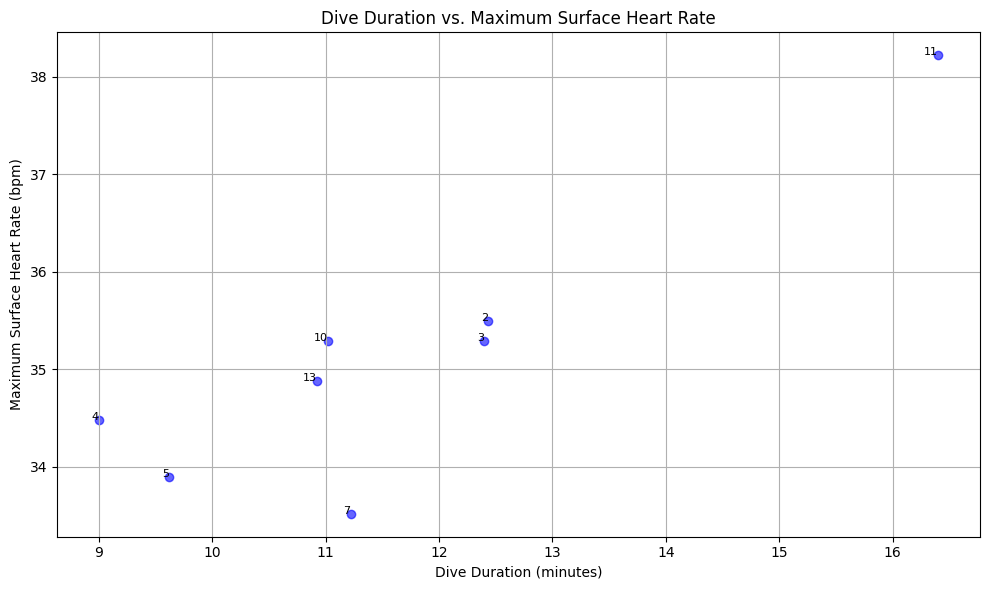

In [86]:
# YOUR CODE HERE (add additional cells as needed)

# Fill missing values with 0 and calculate average heart rate during each dive phase
avg_dive_phase = df.groupby('dive_phase')['heart_rate'].mean().reset_index()
print(f"1. The average heart rate during each dive phase:\n{avg_dive_phase}")

# 1. Data Preparation
# Convert 'timestamp' to datetime format for better handling of time series data
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 2. Calculate  Dive Duration
# Calculate the earliest descent and latest ascent for each dive
earliest_descent = df.query("dive_phase == 'descent'").groupby('dive_id', as_index=False)['timestamp'].min()
lastest_ascent = df.query("dive_phase == 'ascent'").groupby('dive_id', as_index=False)['timestamp'].max()
dive_duration = earliest_descent.merge(lastest_ascent, on='dive_id', how='left', suffixes=('_descent', '_ascent'))
dive_duration['duration_mins'] = round((dive_duration['timestamp_ascent'] - dive_duration['timestamp_descent']).dt.total_seconds() / 60, 2)

# Creating a new DataFrame with dive_id and duration_mins
df_duration = dive_duration[['dive_id', 'duration_mins']]
df_duration = df_duration.rename(columns={'duration_mins': 'dive_duration_mins'})
print(f"\n2. The duration of each dive:\n{df_duration}")

# 3. Determine maximum surface heart rate
max_surface_hr = (
    df.query("dive_phase == 'surface'")
      .groupby('dive_id', as_index=False)['heart_rate']
      .max()
      .rename(columns={'heart_rate': 'max_surface_heart_rate'})
)
print(f"\n3. The maximum heart rate during the surface phase of each dive:\n{max_surface_hr}")

# 4. Merge DataFrames
# Merge the duration and max surface heart rate DataFrames on dive_id
merged_df = df_duration.merge(max_surface_hr, on='dive_id', how='left')

# 5. visualization
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['dive_duration_mins'], merged_df['max_surface_heart_rate'], color='blue', alpha=0.6)

for _, row in merged_df.iterrows():
    dive_id = int(row['dive_id'])  # fuerza a entero
    eje_x = row['dive_duration_mins']
    eje_y = row['max_surface_heart_rate']
    plt.text(
        eje_x,
        eje_y,
        str(dive_id),  # aquí ya se imprime 2 en vez de 2.0
        fontsize=8,
        ha='right'
    )


plt.title('Dive Duration vs. Maximum Surface Heart Rate')
plt.xlabel('Dive Duration (minutes)')
plt.ylabel('Maximum Surface Heart Rate (bpm)')
plt.grid(True)
plt.tight_layout()
plt.show()





